In [1]:
import networkx as nx

Degree

In [2]:
G = nx.Graph()

nodes = ('u', 'v1', 'v2', 'v3', 'v4')

G.add_nodes_from(nodes)

for i in range(1,len(nodes)):
    G.add_edge('u', nodes[i])

assert G.degree('u') == len(nodes) - 1

print(G.degree('u'))

4


In_Degree and Out_Degree

In [3]:
DG = nx.DiGraph()

nodes = ('u', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7')

DG.add_nodes_from(nodes)

# Edges from u to other nodes
DG.add_edge('u','v1')
DG.add_edge('u','v2')
DG.add_edge('u','v3')
DG.add_edge('u','v4')

# Edges from other nodes to u
DG.add_edge('v5', 'u')
DG.add_edge('v6', 'u')
DG.add_edge('v7', 'u')

print(DG.out_degree('u'))
print(DG.in_degree('u'))

# In a directed graph the degree of a node is the sum of the in_degree and out_degree
assert DG.out_degree('u') + DG.in_degree('u') == DG.degree('u')



4
3


In [4]:
def initialize_graph():
    G = nx.Graph()
    nodes = ('u', 'v', 'w', 'x', 'y', 'z')
    G.add_nodes_from(nodes)
    edges = (('u','v'), ('u','w'), ('v','w'), ('v','x'), ('w','x'),
             ('w','y'), ('y','x'), ('x','z'))
    G.add_edges_from(edges)
    return G

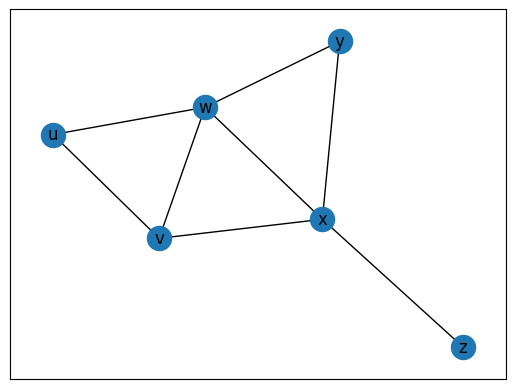

In [5]:
G = initialize_graph()

# Complete graph
nx.draw_networkx(G)

Path

In [6]:
G = initialize_graph()

assert nx.has_path(G, 'x', 'z') == True

assert nx.is_path(G, ['v','x','z']) == True

assert nx.is_path(G, ['u','w','x','y','w','v']) == True


Simple path

In [7]:
G = initialize_graph()

assert nx.is_simple_path(G, ['v','x','z']) == True

# This is not a single path because the path gies through w 2 times
assert nx.is_simple_path(G, ['u','w','x','y','w','v']) == False

Cycles

In [8]:
G = initialize_graph()

print(nx.cycle_basis(G))

[['w', 'x', 'y'], ['w', 'v', 'x'], ['w', 'u', 'v']]


Subgraph

In [9]:
G = initialize_graph()

nodes_sub = ['u','v','w','x','z']

SUB = G.subgraph(nodes_sub)

# This specific subgraph has one node less that the initial graph
assert len(G.nodes) - 1 == len(SUB.nodes)

Disconnected graph

In [10]:
G = initialize_graph()

# The graph is initially connected
assert nx.is_connected(G) == True

# The number of connected elements is 1
assert nx.number_connected_components(G) == 1

# Remove some edges
G.remove_edge('v','x')
G.remove_edge('u','w')
G.remove_edge('v','w')

# The graph is now disconnected
assert nx.is_connected(G) == False

# There are two connected components
assert nx.number_connected_components(G) == 2

Tree

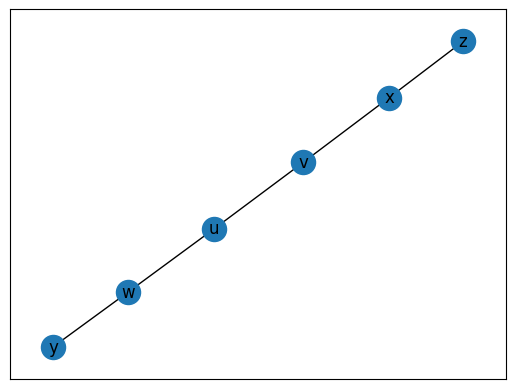

In [11]:
G = initialize_graph()

# Minimum spanning tree
nx.draw_networkx(nx.minimum_spanning_tree(G))

Graph properties

In [12]:
G = nx.complete_graph(10)

sum_deg = 0

for n in G.nodes():
    sum_deg += G.degree(n)
    
# In a complete graph the sum of the degrees is equal to two times the number of edges
assert sum_deg == 2 * len(G.edges())
    

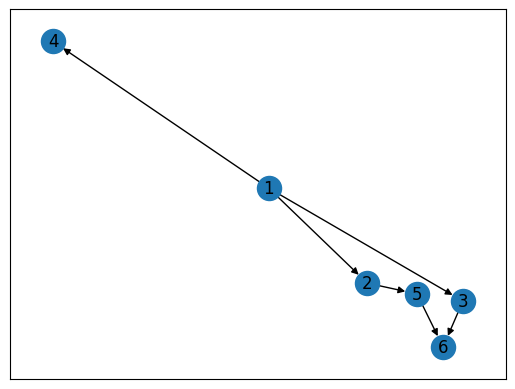

In [13]:
G = nx.DiGraph()

G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (3,6), (5,6)])

nx.draw_networkx(G)

In [14]:
edge_traversal_bfs = list(nx.edge_bfs(G, source=1))

print(edge_traversal_bfs)

[(1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (5, 6)]


In [15]:
edge_traversal_bfs = list(nx.edge_dfs(G, source=1))

print(edge_traversal_bfs)

[(1, 2), (2, 5), (5, 6), (1, 3), (3, 6), (1, 4)]
